### **1. Loading the data:**

 Link for the required dataset : https://www.kaggle.com/datasets/rishisrdy/lipreading

 Download the provided data and load the data into the data folder

In [1]:
path = 'D:\\GitHub\\SI-GuidedProject-602925-1697547982\\Project Development Phase\\Model\\data'

### **2. Data Preparation**

In [2]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

In [5]:
def load_video(path:str) -> List[float]:
  cap = cv2.VideoCapture(path)
  frames = []
  for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    ret, frame = cap.read()
    frame = tf.image.rgb_to_grayscale(frame)
    frames.append(frame[190:236, 80:220,:])
  cap.release()

  mean = tf.math.reduce_mean(frames)
  std = tf.math.reduce_std(tf.cast(frames, tf.float32))
  return tf.cast((frames - mean), tf.float32) / std

In [7]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

In [8]:
char_to_num

In [9]:
num_to_char

In [10]:
def load_alignments(path:str) -> List[str]:
  with open(path, 'r') as f:
    lines = f.readlines()
  tokens = []
  for line in lines:
    line = line.split()
    if line[2] != 'sil':
      tokens = [*tokens, ' ', line[2]]
  return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'),(-1)))[1:]

In [13]:
def load_data(path:str):
  path = bytes.decode(path.numpy())
  file_name = path.split('\\')[-1].split('.')[0]
  video_path = os.path.join('D:\\GitHub\\SI-GuidedProject-602925-1697547982\\Project Development Phase\\Model\\data', 's1',f'{file_name}.mpg')
  alignment_path = os.path.join('D:\\GitHub\\SI-GuidedProject-602925-1697547982\\Project Development Phase\\Model\\data','alignments','s1',f'{file_name}.align')
  frames = load_video(video_path)
  alignments = load_alignments(alignment_path)

  return frames, alignments

In [14]:
test_path = 'D:\\GitHub\\SI-GuidedProject-602925-1697547982\\Project Development Phase\\Model\\data\\s1\\bbal6n.mpg'
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

'bbal6n'

In [15]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [16]:
frames

<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
array([[[[ 1.460374  ],
         [ 1.460374  ],
         [ 1.4209044 ],
         ...,
         [ 0.15787826],
         [ 0.19734783],
         [ 0.07893913]],

        [[ 1.460374  ],
         [ 1.460374  ],
         [ 1.4209044 ],
         ...,
         [ 0.15787826],
         [ 0.07893913],
         [ 0.03946957]],

        [[ 1.4209044 ],
         [ 1.4209044 ],
         [ 1.3814349 ],
         ...,
         [ 0.07893913],
         [ 0.07893913],
         [ 0.07893913]],

        ...,

        [[ 0.9472696 ],
         [ 0.9472696 ],
         [ 0.9472696 ],
         ...,
         [ 9.946331  ],
         [ 9.867392  ],
         [ 9.867392  ]],

        [[ 0.9472696 ],
         [ 0.9472696 ],
         [ 0.9472696 ],
         ...,
         [ 9.906861  ],
         [ 9.867392  ],
         [ 9.867392  ]],

        [[ 0.9472696 ],
         [ 0.9472696 ],
         [ 0.9472696 ],
         ...,
         [ 9.906861  ],
         [ 9.86739

In [17]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23], dtype=int64)>

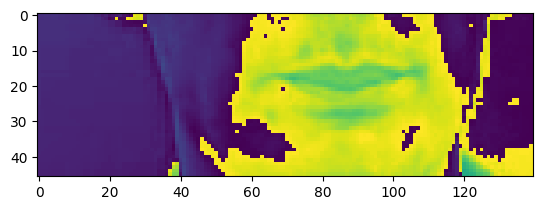

In [18]:
plt.imshow(frames[15])

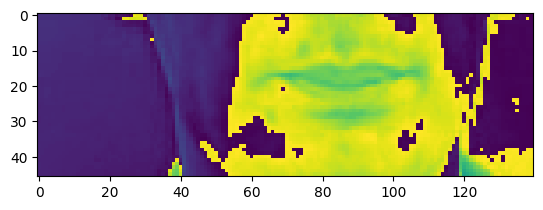

In [19]:
plt.imshow(frames[20])

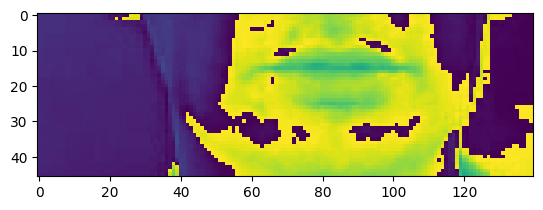

In [20]:
plt.imshow(frames[50])

In [21]:
frames.shape

TensorShape([75, 46, 140, 1])

In [22]:
alignments.shape

TensorShape([21])

In [23]:
len(frames)

75

### 3. Video Pre-processing

In [24]:
import sys

Importing necessary libraries

In [25]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
# %matplotlib inline

Defining the variables

In [26]:
# Here, we define some colours
SCALAR_BLACK = (0.0,0.0,0.0)
SCALAR_WHITE = (255.0,255.0,255.0)
SCALAR_YELLOW = (0.0,255.0,255.0)
SCALAR_GREEN = (0.0,255.0,0.0)
SCALAR_RED = (0.0,0.0,255.0)
SCALAR_CYAN = (255.0,255.0,0.0)

Function to draw the image

In [27]:
# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image,caption in zip(axes, images, captions):
        ax.imshow(image, cmap)
        ax.set_title(caption)

Capturing movements in the video in frame-wise

img1 height = 288
img1 width = 360
img2 height = 288
img2 width = 360
img3 height = 288
img3 width = 360


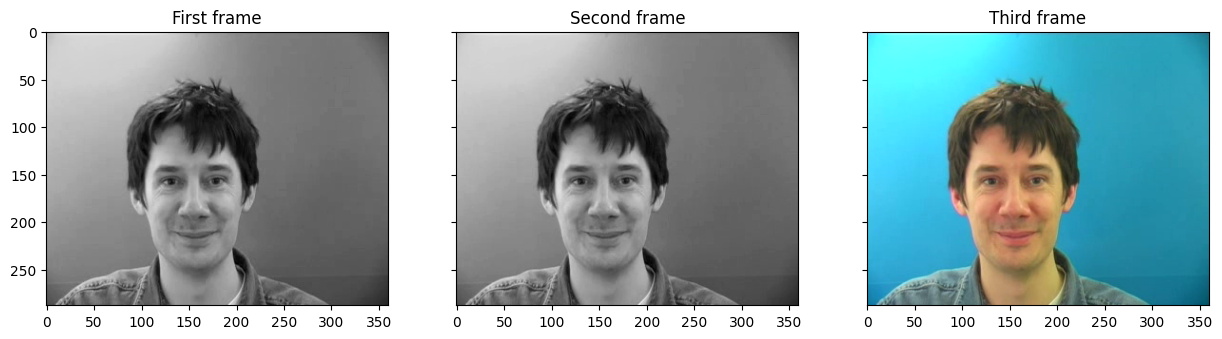

In [29]:
SHOW_DEBUG_STEPS  = True

# Reading video
cap = cv2.VideoCapture('D:\\GitHub\\SI-GuidedProject-602925-1697547982\\Project Development Phase\\Model\\data\\s1\\bbaf3s.mpg')

# if video is not present, show error
if not(cap.isOpened()):
    print("Error reading file")

# Check if you are able to capture the video
ret, fFrame  = cap.read()

# Capturing 2 consecutive frames and making a copy of those frame. Perform all operations on the copy frame.
ret, fFrame1 = cap.read()
ret, fFrame2 = cap.read()
ret, fFrame3 = cap.read()
img1 = fFrame1.copy()
img2 = fFrame2.copy()
img3 = fFrame3.copy()

if(SHOW_DEBUG_STEPS):
    print ('img1 height = ' + str(img1.shape[0]))
    print ('img1 width = ' + str(img1.shape[1]))
    print ('img2 height = ' + str(img2.shape[0]))
    print ('img2 width = ' + str(img2.shape[1]))
    print ('img3 height = ' + str(img3.shape[0]))
    print ('img3 width = ' + str(img3.shape[1]))

# Convert the colour images to greyscale in order to enable fast processing
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

#plotting
plot_image([img1, img2, img3], cmap='gray', captions=["First frame", "Second frame", "Third frame"])


Adding Gaussian blur for smoothening

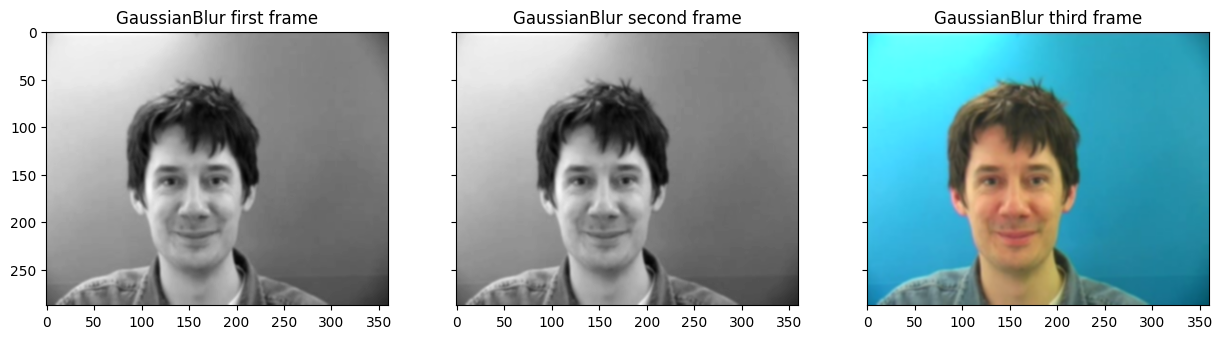

In [30]:
# Add some Gaussian Blur
img1 = cv2.GaussianBlur(img1,(5,5),0)
img2 = cv2.GaussianBlur(img2,(5,5),0)
img3 = cv2.GaussianBlur(img3,(5,5),0)
#plotting
plot_image([img1, img2, img3], cmap='gray', captions=["GaussianBlur first frame", "GaussianBlur second frame", "GaussianBlur third frame"])

Finding movement in the video

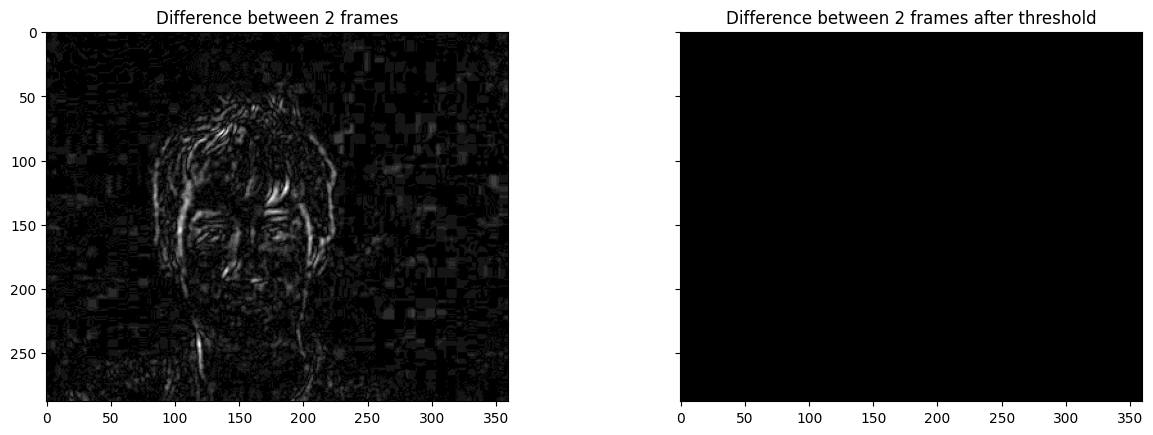

In [31]:
#This imgDiff variable is the difference between consecutive frames, which is equivalent to detecting movement

imgDiff = cv2.absdiff(img1, img2)

# Thresholding the image that is obtained after taking difference. Pixel value below 30 will be set as 0(black) and above as 255(white)
ret,imgThresh = cv2.threshold(imgDiff,30.0,255.0,cv2.THRESH_BINARY)
ht = np.size(imgThresh,0)
wd = np.size(imgThresh,1)
plot_image([imgDiff, imgThresh], cmap='gray', captions = ["Difference between 2 frames", "Difference between 2 frames after threshold"])

### **4. Splitting of data**

Splitting data int train and test and validation sets:

Creating a mapable function:

In [32]:
def mappable_function(path:str) -> List[str]:
  result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
  return result

Splitting:

In [33]:
data = tf.data.Dataset.list_files('D:\\GitHub\\SI-GuidedProject-602925-1697547982\\Project Development Phase\\Model\\data\\s1\\*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75, None, None, None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)

##Added for split
train = data.take(450)
test = data.skip(450)

In [34]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 75, None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 40), dtype=tf.int64, name=None))>

In [35]:
test

<SkipDataset element_spec=(TensorSpec(shape=(None, 75, None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 40), dtype=tf.int64, name=None))>

In [36]:
print(len(train))

print(len(test))

450
50


Printing the preprocessed data:

In [37]:
frames, alignments = data.as_numpy_iterator().next()

In [38]:
frames

array([[[[[1.4524684 ],
          [1.5641967 ],
          [1.4897112 ],
          ...,
          [0.1862139 ],
          [0.3724278 ],
          [0.40967056]],

         [[1.5269539 ],
          [1.6014395 ],
          [1.5269539 ],
          ...,
          [0.11172833],
          [0.3724278 ],
          [0.40967056]],

         [[1.4152255 ],
          [1.4152255 ],
          [1.4152255 ],
          ...,
          [0.1862139 ],
          [0.29794222],
          [0.29794222]],

         ...,

         [[1.0427978 ],
          [1.0427978 ],
          [1.0427978 ],
          ...,
          [0.07448556],
          [0.07448556],
          [0.07448556]],

         [[1.0427978 ],
          [1.0427978 ],
          [1.0427978 ],
          ...,
          [0.07448556],
          [0.07448556],
          [0.07448556]],

         [[1.0427978 ],
          [1.0427978 ],
          [1.0427978 ],
          ...,
          [0.07448556],
          [0.07448556],
          [0.03724278]]],


        [[[1.5269

In [39]:
sample = data.as_numpy_iterator()

In [40]:
sample

In [41]:
val = sample.next(); val[0]

array([[[[[ 1.456915  ],
          [ 1.456915  ],
          [ 1.4973849 ],
          ...,
          [10.319815  ],
          [ 0.        ],
          [ 0.        ]],

         [[ 1.456915  ],
          [ 1.456915  ],
          [ 1.4973849 ],
          ...,
          [10.319815  ],
          [ 0.        ],
          [ 0.        ]],

         [[ 1.3759754 ],
          [ 1.3759754 ],
          [ 1.3759754 ],
          ...,
          [ 0.        ],
          [ 0.        ],
          [ 0.        ]],

         ...,

         [[ 1.0117465 ],
          [ 1.0117465 ],
          [ 1.0117465 ],
          ...,
          [10.157935  ],
          [10.076996  ],
          [10.076996  ]],

         [[ 0.9712767 ],
          [ 0.9712767 ],
          [ 0.9712767 ],
          ...,
          [10.117466  ],
          [10.076996  ],
          [10.076996  ]],

         [[ 0.9712767 ],
          [ 0.9712767 ],
          [ 0.9712767 ],
          ...,
          [10.117466  ],
          [10.076996  ],
          

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [43]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75, 75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):
            print('Original: ', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction: ', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [44]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype='int64')
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")
    
    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    
    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [45]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

print('Bidirectional LSTM model is built successfully')

Bidirectional LSTM model is built successfully


In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                    

In [46]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True)
schedule_callback = LearningRateScheduler(scheduler)
example_callback = ProduceExample(test)

In [47]:
model.compile(optimizer=Adam(learning_rate=0.02), loss=CTCLoss)

In [ ]:
history = model.fit(train, validation_data=test, epochs=100, callbacks=[checkpoint_callback, schedule_callback])

Epoch 1/100
129/450 [=======>......................] - ETA: 3:48 - loss: 91.6139

[mpeg1video @ 0x7864d801fd00] ac-tex damaged at 22 17
[mpeg1video @ 0x7864d801fd00] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 86.6525

[mpeg1video @ 0x7863780635c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7863780635c0] Warning MVs not available


450/450 [==============================] - 562s 1s/step - loss: 86.6525 - val_loss: 126.5831 - lr: 0.0200
Epoch 2/100
 52/450 [==>...........................] - ETA: 4:38 - loss: 81.9282

[mpeg1video @ 0x58c00a8057c0] ac-tex damaged at 22 17
[mpeg1video @ 0x58c00a8057c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 82.4802

[mpeg1video @ 0x78633824df80] ac-tex damaged at 22 17
[mpeg1video @ 0x78633824df80] Warning MVs not available


450/450 [==============================] - 534s 1s/step - loss: 82.4802 - val_loss: 117.2443 - lr: 0.0200
Epoch 3/100
120/450 [=======>......................] - ETA: 3:50 - loss: 81.1733

[mpeg1video @ 0x786378058300] ac-tex damaged at 22 17
[mpeg1video @ 0x786378058300] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 82.3892

[mpeg1video @ 0x7864e4078bc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e4078bc0] Warning MVs not available


450/450 [==============================] - 535s 1s/step - loss: 82.3892 - val_loss: 143.3543 - lr: 0.0200
Epoch 4/100
 31/450 [=>............................] - ETA: 4:56 - loss: 86.6192

[mpeg1video @ 0x78631c0dffc0] ac-tex damaged at 22 17
[mpeg1video @ 0x78631c0dffc0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 81.8530

[mpeg1video @ 0x786344082bc0] ac-tex damaged at 22 17
[mpeg1video @ 0x786344082bc0] Warning MVs not available


450/450 [==============================] - 538s 1s/step - loss: 81.8530 - val_loss: 140.7193 - lr: 0.0200
Epoch 5/100
433/450 [===========================>..] - ETA: 11s - loss: 83.5178

[mpeg1video @ 0x78638403a0c0] ac-tex damaged at 22 17
[mpeg1video @ 0x78638403a0c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 83.4419

[mpeg1video @ 0x78630c082d40] ac-tex damaged at 22 17
[mpeg1video @ 0x78630c082d40] Warning MVs not available


450/450 [==============================] - 536s 1s/step - loss: 83.4419 - val_loss: 135.2464 - lr: 0.0200
Epoch 6/100
242/450 [===============>..............] - ETA: 2:25 - loss: 81.1992

[mpeg1video @ 0x7863200b84c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7863200b84c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 80.9118

[mpeg1video @ 0x78637c085a00] ac-tex damaged at 22 17
[mpeg1video @ 0x78637c085a00] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 80.9118 - val_loss: 123.8349 - lr: 0.0200
Epoch 7/100
 35/450 [=>............................] - ETA: 4:49 - loss: 81.5933

[mpeg1video @ 0x7864dc05c780] ac-tex damaged at 22 17
[mpeg1video @ 0x7864dc05c780] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 82.1737

[mpeg1video @ 0x786320074880] ac-tex damaged at 22 17
[mpeg1video @ 0x786320074880] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 82.1737 - val_loss: 149.7309 - lr: 0.0200
Epoch 8/100
450/450 [==============================] - ETA: 0s - loss: 84.9026

[mpeg1video @ 0x786384002c00] ac-tex damaged at 22 17
[mpeg1video @ 0x786384002c00] Warning MVs not available


450/450 [==============================] - 531s 1s/step - loss: 84.9026 - val_loss: 145.1910 - lr: 0.0200
Epoch 9/100
164/450 [=========>....................] - ETA: 3:19 - loss: 84.0322

[mpeg1video @ 0x7864e0027140] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e0027140] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 83.1787

[mpeg1video @ 0x78632c089580] ac-tex damaged at 22 17
[mpeg1video @ 0x78632c089580] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 83.1787 - val_loss: 144.1564 - lr: 0.0200
Epoch 10/100
350/450 [======================>.......] - ETA: 1:09 - loss: 83.5357

[mpeg1video @ 0x7863740113c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7863740113c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 83.2788

[mpeg1video @ 0x7864e404cb40] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e404cb40] Warning MVs not available


450/450 [==============================] - 530s 1s/step - loss: 83.2788 - val_loss: 123.5085 - lr: 0.0200
Epoch 11/100
 23/450 [>.............................] - ETA: 4:58 - loss: 81.8651

[mpeg1video @ 0x58c00aa27dc0] ac-tex damaged at 22 17
[mpeg1video @ 0x58c00aa27dc0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 82.8297

[mpeg1video @ 0x78616ad22c40] ac-tex damaged at 22 17
[mpeg1video @ 0x78616ad22c40] Warning MVs not available


450/450 [==============================] - 531s 1s/step - loss: 82.8297 - val_loss: 106.7981 - lr: 0.0200
Epoch 12/100
312/450 [===================>..........] - ETA: 1:35 - loss: 81.7992

[mpeg1video @ 0x78637c0c47c0] ac-tex damaged at 22 17
[mpeg1video @ 0x78637c0c47c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 82.4133

[mpeg1video @ 0x7864e008fb40] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e008fb40] Warning MVs not available


450/450 [==============================] - 531s 1s/step - loss: 82.4133 - val_loss: 149.5541 - lr: 0.0200
Epoch 13/100
196/450 [============>.................] - ETA: 2:56 - loss: 81.9111

[mpeg1video @ 0x78632c092940] ac-tex damaged at 22 17
[mpeg1video @ 0x78632c092940] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 82.4914

[mpeg1video @ 0x78634807e640] ac-tex damaged at 22 17
[mpeg1video @ 0x78634807e640] Warning MVs not available


450/450 [==============================] - 530s 1s/step - loss: 82.4914 - val_loss: 118.1915 - lr: 0.0200
Epoch 14/100
 74/450 [===>..........................] - ETA: 4:21 - loss: 85.0106

[mpeg1video @ 0x7864cc049640] ac-tex damaged at 22 17
[mpeg1video @ 0x7864cc049640] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 81.8466

[mpeg1video @ 0x78630c094fc0] ac-tex damaged at 22 17
[mpeg1video @ 0x78630c094fc0] Warning MVs not available


450/450 [==============================] - 531s 1s/step - loss: 81.8466 - val_loss: 110.7569 - lr: 0.0200
Epoch 15/100
450/450 [==============================] - ETA: 0s - loss: 81.9061

[mpeg1video @ 0x7863e8092b80] ac-tex damaged at 22 17
[mpeg1video @ 0x7863e8092b80] Warning MVs not available


450/450 [==============================] - 531s 1s/step - loss: 81.9061 - val_loss: 136.2469 - lr: 0.0200
Epoch 16/100
289/450 [==================>...........] - ETA: 1:52 - loss: 81.7880

[mpeg1video @ 0x7864e400d380] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e400d380] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 81.7476

[mpeg1video @ 0x786320014340] ac-tex damaged at 22 17
[mpeg1video @ 0x786320014340] Warning MVs not available


450/450 [==============================] - 533s 1s/step - loss: 81.7476 - val_loss: 122.7644 - lr: 0.0200
Epoch 17/100
450/450 [==============================] - ETA: 0s - loss: 82.5975

[mpeg1video @ 0x786338413980] ac-tex damaged at 22 17
[mpeg1video @ 0x786338413980] Warning MVs not available
[mpeg1video @ 0x78641801e100] ac-tex damaged at 22 17
[mpeg1video @ 0x78641801e100] Warning MVs not available


450/450 [==============================] - 533s 1s/step - loss: 82.5975 - val_loss: 107.9679 - lr: 0.0200
Epoch 18/100
 73/450 [===>..........................] - ETA: 4:22 - loss: 81.9194

[mpeg1video @ 0x58c00ae4b280] ac-tex damaged at 22 17
[mpeg1video @ 0x58c00ae4b280] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 82.7423

[mpeg1video @ 0x78633070c980] ac-tex damaged at 22 17
[mpeg1video @ 0x78633070c980] Warning MVs not available


450/450 [==============================] - 534s 1s/step - loss: 82.7423 - val_loss: 124.9869 - lr: 0.0200
Epoch 19/100
450/450 [==============================] - ETA: 0s - loss: 82.3702

[mpeg1video @ 0x7864e4018180] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e4018180] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 82.3702 - val_loss: 125.8989 - lr: 0.0200
Epoch 20/100
275/450 [=================>............] - ETA: 2:01 - loss: 82.9155

[mpeg1video @ 0x78631c0a0380] ac-tex damaged at 22 17
[mpeg1video @ 0x78631c0a0380] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 82.2532

[mpeg1video @ 0x786368065dc0] ac-tex damaged at 22 17
[mpeg1video @ 0x786368065dc0] Warning MVs not available


450/450 [==============================] - 531s 1s/step - loss: 82.2532 - val_loss: 140.0579 - lr: 0.0200
Epoch 21/100
295/450 [==================>...........] - ETA: 1:47 - loss: 82.2276

[mpeg1video @ 0x7863e805f380] ac-tex damaged at 22 17
[mpeg1video @ 0x7863e805f380] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 82.0384

[mpeg1video @ 0x78630c0a1ac0] ac-tex damaged at 22 17
[mpeg1video @ 0x78630c0a1ac0] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 82.0384 - val_loss: 117.2450 - lr: 0.0200
Epoch 22/100
287/450 [==================>...........] - ETA: 1:53 - loss: 81.8437

[mpeg1video @ 0x786320007640] ac-tex damaged at 22 17
[mpeg1video @ 0x786320007640] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 81.6135

[mpeg1video @ 0x786374019cc0] ac-tex damaged at 22 17
[mpeg1video @ 0x786374019cc0] Warning MVs not available


450/450 [==============================] - 531s 1s/step - loss: 81.6135 - val_loss: 146.9277 - lr: 0.0200
Epoch 23/100
450/450 [==============================] - ETA: 0s - loss: 82.3264

[mpeg1video @ 0x78632404e100] ac-tex damaged at 22 17
[mpeg1video @ 0x78632404e100] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 82.3264 - val_loss: 153.7928 - lr: 0.0200
Epoch 24/100
202/450 [============>.................] - ETA: 2:53 - loss: 81.3454

[mpeg1video @ 0x786344030780] ac-tex damaged at 22 17
[mpeg1video @ 0x786344030780] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 82.1629

[mpeg1video @ 0x7863e807c140] ac-tex damaged at 22 17
[mpeg1video @ 0x7863e807c140] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 82.1629 - val_loss: 124.4254 - lr: 0.0200
Epoch 25/100
389/450 [========================>.....] - ETA: 42s - loss: 82.6197

[mpeg1video @ 0x7864e4020b40] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e4020b40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 82.8414

[mpeg1video @ 0x7863280b4c40] ac-tex damaged at 22 17
[mpeg1video @ 0x7863280b4c40] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 82.8414 - val_loss: 134.1470 - lr: 0.0200
Epoch 26/100
 21/450 [>.............................] - ETA: 4:56 - loss: 84.9995

[mpeg1video @ 0x78634806e6c0] ac-tex damaged at 22 17
[mpeg1video @ 0x78634806e6c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 83.0135

[mpeg1video @ 0x7864dc0a42c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7864dc0a42c0] Warning MVs not available


450/450 [==============================] - 530s 1s/step - loss: 83.0135 - val_loss: 103.9363 - lr: 0.0200
Epoch 27/100
279/450 [=================>............] - ETA: 1:59 - loss: 83.8330

[mpeg1video @ 0x58c00b6d69c0] ac-tex damaged at 22 17
[mpeg1video @ 0x58c00b6d69c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 83.7895

[mpeg1video @ 0x78634408ec00] ac-tex damaged at 22 17
[mpeg1video @ 0x78634408ec00] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 83.7895 - val_loss: 146.2169 - lr: 0.0200
Epoch 28/100
116/450 [======>.......................] - ETA: 3:54 - loss: 83.8078

[mpeg1video @ 0x78637004eb40] ac-tex damaged at 22 17
[mpeg1video @ 0x78637004eb40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 83.7354

[mpeg1video @ 0x7864f00fa1c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7864f00fa1c0] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 83.7354 - val_loss: 124.7940 - lr: 0.0200
Epoch 29/100
388/450 [========================>.....] - ETA: 43s - loss: 84.8028

[mpeg1video @ 0x78632c0b3600] ac-tex damaged at 22 17
[mpeg1video @ 0x78632c0b3600] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 84.6680

[mpeg1video @ 0x78637000b0c0] ac-tex damaged at 22 17
[mpeg1video @ 0x78637000b0c0] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 84.6680 - val_loss: 135.6782 - lr: 0.0200
Epoch 30/100
395/450 [=========================>....] - ETA: 38s - loss: 84.5339

[mpeg1video @ 0x7864cc03cc40] ac-tex damaged at 22 17
[mpeg1video @ 0x7864cc03cc40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 84.3434

[mpeg1video @ 0x78631c0dbe80] ac-tex damaged at 22 17
[mpeg1video @ 0x78631c0dbe80] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 84.3434 - val_loss: 138.4945 - lr: 0.0200
Epoch 31/100
211/450 [=============>................] - ETA: 2:48 - loss: 83.9725

[mpeg1video @ 0x78616a46b280] ac-tex damaged at 22 17
[mpeg1video @ 0x78616a46b280] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 83.4640

[mpeg1video @ 0x78637807cc40] ac-tex damaged at 22 17
[mpeg1video @ 0x78637807cc40] Warning MVs not available


450/450 [==============================] - 536s 1s/step - loss: 83.4640 - val_loss: 134.7827 - lr: 0.0181
Epoch 32/100
310/450 [===================>..........] - ETA: 1:38 - loss: 83.6998

[mpeg1video @ 0x7864e40939c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e40939c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 83.5267

[mpeg1video @ 0x78632800a080] ac-tex damaged at 22 17
[mpeg1video @ 0x78632800a080] Warning MVs not available


450/450 [==============================] - 535s 1s/step - loss: 83.5267 - val_loss: 145.1636 - lr: 0.0164
Epoch 33/100
368/450 [=======================>......] - ETA: 57s - loss: 82.5255

[mpeg1video @ 0x78633885e840] ac-tex damaged at 22 17
[mpeg1video @ 0x78633885e840] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 82.6137

[mpeg1video @ 0x7864d002d340] ac-tex damaged at 22 17
[mpeg1video @ 0x7864d002d340] Warning MVs not available


450/450 [==============================] - 535s 1s/step - loss: 82.6137 - val_loss: 136.5226 - lr: 0.0148
Epoch 34/100
324/450 [====================>.........] - ETA: 1:27 - loss: 81.4778

[mpeg1video @ 0x7863040359c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7863040359c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 81.3017

[mpeg1video @ 0x786330de7a00] ac-tex damaged at 22 17
[mpeg1video @ 0x786330de7a00] Warning MVs not available


450/450 [==============================] - 535s 1s/step - loss: 81.3017 - val_loss: 143.2216 - lr: 0.0134
Epoch 35/100
266/450 [================>.............] - ETA: 2:08 - loss: 81.4868

[mpeg1video @ 0x786368011800] ac-tex damaged at 22 17
[mpeg1video @ 0x786368011800] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 81.5471

[mpeg1video @ 0x7864e8084200] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e8084200] Warning MVs not available


450/450 [==============================] - 533s 1s/step - loss: 81.5471 - val_loss: 125.9936 - lr: 0.0121
Epoch 36/100
226/450 [==============>...............] - ETA: 2:36 - loss: 80.7239

[mpeg1video @ 0x78632408fd00] ac-tex damaged at 22 17
[mpeg1video @ 0x78632408fd00] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 80.9493

[mpeg1video @ 0x786344046a00] ac-tex damaged at 22 17
[mpeg1video @ 0x786344046a00] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 80.9493 - val_loss: 123.9960 - lr: 0.0110
Epoch 37/100
104/450 [=====>........................] - ETA: 4:00 - loss: 81.5744

[mpeg1video @ 0x78637c051c00] ac-tex damaged at 22 17
[mpeg1video @ 0x78637c051c00] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 81.0160

[mpeg1video @ 0x7864f00521c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7864f00521c0] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 81.0160 - val_loss: 131.8916 - lr: 0.0099
Epoch 38/100
421/450 [===========================>..] - ETA: 20s - loss: 81.1388

[mpeg1video @ 0x786320049c80] ac-tex damaged at 22 17
[mpeg1video @ 0x786320049c80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 81.0781

[mpeg1video @ 0x786374042b80] ac-tex damaged at 22 17
[mpeg1video @ 0x786374042b80] Warning MVs not available


450/450 [==============================] - 534s 1s/step - loss: 81.0781 - val_loss: 131.6641 - lr: 0.0090
Epoch 39/100
192/450 [===========>..................] - ETA: 2:59 - loss: 80.1635

[mpeg1video @ 0x7864d00ff100] ac-tex damaged at 22 17
[mpeg1video @ 0x7864d00ff100] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 80.4000

[mpeg1video @ 0x78631c0c7a80] ac-tex damaged at 22 17
[mpeg1video @ 0x78631c0c7a80] Warning MVs not available


450/450 [==============================] - 534s 1s/step - loss: 80.4000 - val_loss: 132.0003 - lr: 0.0081
Epoch 40/100
 88/450 [====>.........................] - ETA: 4:12 - loss: 80.5608

[mpeg1video @ 0x78616a68c7c0] ac-tex damaged at 22 17
[mpeg1video @ 0x78616a68c7c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 80.7348

[mpeg1video @ 0x7863e807bb80] ac-tex damaged at 22 17
[mpeg1video @ 0x7863e807bb80] Warning MVs not available


450/450 [==============================] - 533s 1s/step - loss: 80.7348 - val_loss: 127.8282 - lr: 0.0074
Epoch 41/100
 91/450 [=====>........................] - ETA: 4:10 - loss: 79.7631

[mpeg1video @ 0x7864e80b8ec0] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e80b8ec0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 80.1379

[mpeg1video @ 0x7863304a15c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7863304a15c0] Warning MVs not available


450/450 [==============================] - 533s 1s/step - loss: 80.1379 - val_loss: 120.6653 - lr: 0.0067
Epoch 42/100
344/450 [=====================>........] - ETA: 1:14 - loss: 79.2032

[mpeg1video @ 0x786340059440] ac-tex damaged at 22 17
[mpeg1video @ 0x786340059440] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 79.2699

[mpeg1video @ 0x7864e4060580] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e4060580] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 79.2699 - val_loss: 139.9059 - lr: 0.0060
Epoch 43/100
310/450 [===================>..........] - ETA: 1:37 - loss: 78.5674

[mpeg1video @ 0x58c009b1bcc0] ac-tex damaged at 22 17
[mpeg1video @ 0x58c009b1bcc0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 78.5258

[mpeg1video @ 0x7863381c7340] ac-tex damaged at 22 17
[mpeg1video @ 0x7863381c7340] Warning MVs not available


450/450 [==============================] - 533s 1s/step - loss: 78.5258 - val_loss: 132.1641 - lr: 0.0055
Epoch 44/100
225/450 [==============>...............] - ETA: 2:36 - loss: 79.0120

[mpeg1video @ 0x78637001e680] ac-tex damaged at 22 17
[mpeg1video @ 0x78637001e680] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 78.8163

[mpeg1video @ 0x58c009b25600] ac-tex damaged at 22 17
[mpeg1video @ 0x58c009b25600] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 78.8163 - val_loss: 121.0760 - lr: 0.0049
Epoch 45/100
370/450 [=======================>......] - ETA: 55s - loss: 79.0465

[mpeg1video @ 0x7863240534c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7863240534c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 78.9235

[mpeg1video @ 0x78634804f8c0] ac-tex damaged at 22 17
[mpeg1video @ 0x78634804f8c0] Warning MVs not available


450/450 [==============================] - 535s 1s/step - loss: 78.9235 - val_loss: 128.1403 - lr: 0.0045
Epoch 46/100
376/450 [========================>.....] - ETA: 51s - loss: 78.6673

[mpeg1video @ 0x78641801aac0] ac-tex damaged at 22 17
[mpeg1video @ 0x78641801aac0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 78.6452

[mpeg1video @ 0x78631c026e80] ac-tex damaged at 22 17
[mpeg1video @ 0x78631c026e80] Warning MVs not available


450/450 [==============================] - 558s 1s/step - loss: 78.6452 - val_loss: 131.7631 - lr: 0.0040
Epoch 47/100
  5/450 [..............................] - ETA: 5:09 - loss: 78.8987

[mpeg1video @ 0x7861894cc8c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7861894cc8c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 78.7071

[mpeg1video @ 0x7863e8011a80] ac-tex damaged at 22 17
[mpeg1video @ 0x7863e8011a80] Warning MVs not available


450/450 [==============================] - 536s 1s/step - loss: 78.7071 - val_loss: 140.4837 - lr: 0.0037
Epoch 48/100
396/450 [=========================>....] - ETA: 37s - loss: 78.4711

[mpeg1video @ 0x7864e402b400] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e402b400] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 78.4425

[mpeg1video @ 0x78632803abc0] ac-tex damaged at 22 17
[mpeg1video @ 0x78632803abc0] Warning MVs not available


450/450 [==============================] - 533s 1s/step - loss: 78.4425 - val_loss: 127.3219 - lr: 0.0033
Epoch 49/100
305/450 [===================>..........] - ETA: 1:41 - loss: 78.2807

[mpeg1video @ 0x786348069440] ac-tex damaged at 22 17
[mpeg1video @ 0x786348069440] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 78.3100

[mpeg1video @ 0x7864cc07fd40] ac-tex damaged at 22 17
[mpeg1video @ 0x7864cc07fd40] Warning MVs not available


450/450 [==============================] - 534s 1s/step - loss: 78.3100 - val_loss: 135.6567 - lr: 0.0030
Epoch 50/100
450/450 [==============================] - ETA: 0s - loss: 78.1480

[mpeg1video @ 0x78616ad39300] ac-tex damaged at 22 17
[mpeg1video @ 0x78616ad39300] Warning MVs not available


450/450 [==============================] - 534s 1s/step - loss: 78.1480 - val_loss: 133.6130 - lr: 0.0027
Epoch 51/100
450/450 [==============================] - ETA: 0s - loss: 78.2084

[mpeg1video @ 0x7864e80a6a00] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e80a6a00] Warning MVs not available


450/450 [==============================] - 533s 1s/step - loss: 78.2084 - val_loss: 136.8563 - lr: 0.0024
Epoch 52/100
338/450 [=====================>........] - ETA: 1:18 - loss: 78.1299

[mpeg1video @ 0x7863180e54c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7863180e54c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 77.7299

[mpeg1video @ 0x786344045d80] ac-tex damaged at 22 17
[mpeg1video @ 0x786344045d80] Warning MVs not available


450/450 [==============================] - 533s 1s/step - loss: 77.7299 - val_loss: 127.5818 - lr: 0.0022
Epoch 53/100
  1/450 [..............................] - ETA: 5:21 - loss: 72.4078

[mpeg1video @ 0x7863e8009480] ac-tex damaged at 22 17
[mpeg1video @ 0x7863e8009480] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 77.1207

[mpeg1video @ 0x78630c084000] ac-tex damaged at 22 17
[mpeg1video @ 0x78630c084000] Warning MVs not available


450/450 [==============================] - 533s 1s/step - loss: 77.1207 - val_loss: 133.7620 - lr: 0.0020
Epoch 54/100
 52/450 [==>...........................] - ETA: 4:38 - loss: 77.1365

[mpeg1video @ 0x7863280810c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7863280810c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 77.4100

[mpeg1video @ 0x78637c034100] ac-tex damaged at 22 17
[mpeg1video @ 0x78637c034100] Warning MVs not available


450/450 [==============================] - 531s 1s/step - loss: 77.4100 - val_loss: 125.4695 - lr: 0.0018
Epoch 55/100
228/450 [==============>...............] - ETA: 2:34 - loss: 76.6331

[mpeg1video @ 0x7864dc08c640] ac-tex damaged at 22 17
[mpeg1video @ 0x7864dc08c640] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.9540

[mpeg1video @ 0x78631c09c180] ac-tex damaged at 22 17
[mpeg1video @ 0x78631c09c180] Warning MVs not available


450/450 [==============================] - 531s 1s/step - loss: 76.9540 - val_loss: 131.7124 - lr: 0.0016
Epoch 56/100
 62/450 [===>..........................] - ETA: 4:31 - loss: 76.6051

[mpeg1video @ 0x78634402b800] ac-tex damaged at 22 17
[mpeg1video @ 0x78634402b800] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 77.2551

[mpeg1video @ 0x7863840043c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7863840043c0] Warning MVs not available


450/450 [==============================] - 534s 1s/step - loss: 77.2551 - val_loss: 130.5402 - lr: 0.0015
Epoch 57/100
184/450 [===========>..................] - ETA: 3:05 - loss: 76.6590

[mpeg1video @ 0x7864e8055880] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e8055880] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.8853

[mpeg1video @ 0x78616aadeb00] ac-tex damaged at 22 17
[mpeg1video @ 0x78616aadeb00] Warning MVs not available


450/450 [==============================] - 534s 1s/step - loss: 76.8853 - val_loss: 138.2196 - lr: 0.0013
Epoch 58/100
450/450 [==============================] - ETA: 0s - loss: 77.3549

[mpeg1video @ 0x7864e40543c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e40543c0] Warning MVs not available


450/450 [==============================] - 535s 1s/step - loss: 77.3549 - val_loss: 124.2016 - lr: 0.0012
Epoch 59/100
 12/450 [..............................] - ETA: 5:10 - loss: 80.7914

[mpeg1video @ 0x7863180ac240] ac-tex damaged at 22 17
[mpeg1video @ 0x7863180ac240] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 77.4291

[mpeg1video @ 0x78634409e040] ac-tex damaged at 22 17
[mpeg1video @ 0x78634409e040] Warning MVs not available


450/450 [==============================] - 541s 1s/step - loss: 77.4291 - val_loss: 128.3256 - lr: 0.0011
Epoch 60/100
450/450 [==============================] - ETA: 0s - loss: 76.9985

[mpeg1video @ 0x7864f009db40] ac-tex damaged at 22 17
[mpeg1video @ 0x7864f009db40] Warning MVs not available


450/450 [==============================] - 544s 1s/step - loss: 76.9985 - val_loss: 129.3851 - lr: 9.9574e-04
Epoch 61/100
 36/450 [=>............................] - ETA: 4:55 - loss: 77.4999

[mpeg1video @ 0x78632007ed40] ac-tex damaged at 22 17
[mpeg1video @ 0x78632007ed40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 77.1305

[mpeg1video @ 0x78637401e040] ac-tex damaged at 22 17
[mpeg1video @ 0x78637401e040] Warning MVs not available


450/450 [==============================] - 545s 1s/step - loss: 77.1305 - val_loss: 131.6332 - lr: 9.0098e-04
Epoch 62/100
312/450 [===================>..........] - ETA: 1:39 - loss: 76.6372

[mpeg1video @ 0x786418027540] ac-tex damaged at 22 17
[mpeg1video @ 0x786418027540] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.6850

[mpeg1video @ 0x7863180ac5c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7863180ac5c0] Warning MVs not available


450/450 [==============================] - 545s 1s/step - loss: 76.6850 - val_loss: 132.7238 - lr: 8.1524e-04
Epoch 63/100
450/450 [==============================] - ETA: 0s - loss: 76.6662

[mpeg1video @ 0x7863e8002340] ac-tex damaged at 22 17
[mpeg1video @ 0x7863e8002340] Warning MVs not available


450/450 [==============================] - 543s 1s/step - loss: 76.6662 - val_loss: 130.6808 - lr: 7.3766e-04
Epoch 64/100
406/450 [==========================>...] - ETA: 30s - loss: 77.0526

[mpeg1video @ 0x7864e80748c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e80748c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.9942

[mpeg1video @ 0x78632047c2c0] ac-tex damaged at 22 17
[mpeg1video @ 0x78632047c2c0] Warning MVs not available


450/450 [==============================] - 537s 1s/step - loss: 76.9942 - val_loss: 129.1176 - lr: 6.6746e-04
Epoch 65/100
329/450 [====================>.........] - ETA: 1:25 - loss: 76.6815

[mpeg1video @ 0x786344026c40] ac-tex damaged at 22 17
[mpeg1video @ 0x786344026c40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.7204

[mpeg1video @ 0x7864dc01d680] ac-tex damaged at 22 17
[mpeg1video @ 0x7864dc01d680] Warning MVs not available


450/450 [==============================] - 536s 1s/step - loss: 76.7204 - val_loss: 128.0594 - lr: 6.0395e-04
Epoch 66/100
259/450 [================>.............] - ETA: 2:14 - loss: 76.4878

[mpeg1video @ 0x58c003be1c80] ac-tex damaged at 22 17
[mpeg1video @ 0x58c003be1c80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.7208

[mpeg1video @ 0x786344030440] ac-tex damaged at 22 17
[mpeg1video @ 0x786344030440] Warning MVs not available


450/450 [==============================] - 537s 1s/step - loss: 76.7208 - val_loss: 134.2054 - lr: 5.4647e-04
Epoch 67/100
327/450 [====================>.........] - ETA: 1:26 - loss: 76.6271

[mpeg1video @ 0x78637001a180] ac-tex damaged at 22 17
[mpeg1video @ 0x78637001a180] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.4984

[mpeg1video @ 0x7864f011b1c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7864f011b1c0] Warning MVs not available


450/450 [==============================] - 535s 1s/step - loss: 76.4984 - val_loss: 131.3386 - lr: 4.9447e-04
Epoch 68/100
 49/450 [==>...........................] - ETA: 4:41 - loss: 75.8937

[mpeg1video @ 0x78631c09ae80] ac-tex damaged at 22 17
[mpeg1video @ 0x78631c09ae80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.1323

[mpeg1video @ 0x786368073a80] ac-tex damaged at 22 17
[mpeg1video @ 0x786368073a80] Warning MVs not available


450/450 [==============================] - 534s 1s/step - loss: 76.1323 - val_loss: 131.8138 - lr: 4.4741e-04
Epoch 69/100


[mpeg1video @ 0x7864cc03edc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7864cc03edc0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.5421

[mpeg1video @ 0x58c00b6293c0] ac-tex damaged at 22 17
[mpeg1video @ 0x58c00b6293c0] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 76.5421 - val_loss: 136.4719 - lr: 4.0484e-04
Epoch 70/100
 82/450 [====>.........................] - ETA: 4:17 - loss: 76.2799

[mpeg1video @ 0x786330746800] ac-tex damaged at 22 17
[mpeg1video @ 0x786330746800] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.3624

[mpeg1video @ 0x78637c05e2c0] ac-tex damaged at 22 17
[mpeg1video @ 0x78637c05e2c0] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 76.3624 - val_loss: 133.8822 - lr: 3.6631e-04
Epoch 71/100
343/450 [=====================>........] - ETA: 1:14 - loss: 76.5258

[mpeg1video @ 0x7864d002c600] ac-tex damaged at 22 17
[mpeg1video @ 0x7864d002c600] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.3016

[mpeg1video @ 0x786324075b40] ac-tex damaged at 22 17
[mpeg1video @ 0x786324075b40] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 76.3016 - val_loss: 130.7978 - lr: 3.3145e-04
Epoch 72/100
220/450 [=============>................] - ETA: 2:40 - loss: 76.3874

[mpeg1video @ 0x786344035500] ac-tex damaged at 22 17
[mpeg1video @ 0x786344035500] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.3019

[mpeg1video @ 0x7864d009cf40] ac-tex damaged at 22 17
[mpeg1video @ 0x7864d009cf40] Warning MVs not available


450/450 [==============================] - 533s 1s/step - loss: 76.3019 - val_loss: 129.4505 - lr: 2.9991e-04
Epoch 73/100
176/450 [==========>...................] - ETA: 3:10 - loss: 75.7869

[mpeg1video @ 0x58c00a8c8400] ac-tex damaged at 22 17
[mpeg1video @ 0x58c00a8c8400] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.0703

[mpeg1video @ 0x78616ae6e740] ac-tex damaged at 22 17
[mpeg1video @ 0x78616ae6e740] Warning MVs not available


450/450 [==============================] - 534s 1s/step - loss: 76.0703 - val_loss: 129.5763 - lr: 2.7137e-04
Epoch 74/100
264/450 [================>.............] - ETA: 2:09 - loss: 76.9541

[mpeg1video @ 0x78637400f440] ac-tex damaged at 22 17
[mpeg1video @ 0x78637400f440] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.3918

[mpeg1video @ 0x7864e00346c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e00346c0] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 76.3918 - val_loss: 131.5368 - lr: 2.4555e-04
Epoch 75/100
450/450 [==============================] - ETA: 0s - loss: 75.8247

[mpeg1video @ 0x786340425840] ac-tex damaged at 22 17
[mpeg1video @ 0x786340425840] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 75.8247 - val_loss: 130.2387 - lr: 2.2218e-04
Epoch 76/100
324/450 [====================>.........] - ETA: 1:27 - loss: 76.2352

[mpeg1video @ 0x786418010b80] ac-tex damaged at 22 17
[mpeg1video @ 0x786418010b80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.1636

[mpeg1video @ 0x58c00a8d18c0] ac-tex damaged at 22 17
[mpeg1video @ 0x58c00a8d18c0] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 76.1636 - val_loss: 128.9099 - lr: 2.0104e-04
Epoch 77/100
332/450 [=====================>........] - ETA: 1:22 - loss: 76.1289

[mpeg1video @ 0x78618927b680] ac-tex damaged at 22 17
[mpeg1video @ 0x78618927b680] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 75.9525

[mpeg1video @ 0x78637c039f40] ac-tex damaged at 22 17
[mpeg1video @ 0x78637c039f40] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 75.9525 - val_loss: 129.5591 - lr: 1.8191e-04
Epoch 78/100
166/450 [==========>...................] - ETA: 3:17 - loss: 76.4204

[mpeg1video @ 0x7864dc038340] ac-tex damaged at 22 17
[mpeg1video @ 0x7864dc038340] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.2397

[mpeg1video @ 0x786324080280] ac-tex damaged at 22 17
[mpeg1video @ 0x786324080280] Warning MVs not available


450/450 [==============================] - 532s 1s/step - loss: 76.2397 - val_loss: 130.4434 - lr: 1.6459e-04
Epoch 79/100
450/450 [==============================] - ETA: 0s - loss: 76.4566

[mpeg1video @ 0x7863e805ad80] ac-tex damaged at 22 17
[mpeg1video @ 0x7863e805ad80] Warning MVs not available


450/450 [==============================] - 534s 1s/step - loss: 76.4566 - val_loss: 131.6600 - lr: 1.4893e-04
Epoch 80/100
450/450 [==============================] - ETA: 0s - loss: 76.0754

[mpeg1video @ 0x78616a3fc640] ac-tex damaged at 22 17
[mpeg1video @ 0x78616a3fc640] Warning MVs not available


450/450 [==============================] - 535s 1s/step - loss: 76.0754 - val_loss: 130.0143 - lr: 1.3476e-04
Epoch 81/100
274/450 [=================>............] - ETA: 2:03 - loss: 75.9455

[mpeg1video @ 0x7863700ab440] ac-tex damaged at 22 17
[mpeg1video @ 0x7863700ab440] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.0717

[mpeg1video @ 0x7864e000b4c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7864e000b4c0] Warning MVs not available


In [50]:
model.save("LipReading.keras")

In [53]:
var = model.evaluate(test)
print("Loss: ",var)

50/50 [==============================] - 168s 386ms/step - loss: 1.0767
Loss:  1.0767490863800049


In [51]:
test_data = test.as_numpy_iterator()

In [52]:
sample = test_data.next()

In [54]:
yhat = model.predict(sample[0])

1/1 [==============================] - 1s 1s/step


In [55]:
print('REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'place green in x eight please'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay red by e seven soon'>]

In [56]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [57]:
print('PREDICTIONS')
print([tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded])

print("\n\n",tf.strings.reduce_join(num_to_char(decoded)).numpy().decode('utf-8'))

PREDICTIONS
[<tf.Tensor: shape=(), dtype=string, numpy=b'place green in x eight please'>, <tf.Tensor: shape=(), dtype=string, numpy=b'lay red by e seven soon'>]


 place green in x eight pleaselay red by e seven soon


## Test on random video

In [59]:
sample = load_data(tf.convert_to_tensor("D:\\GitHub\\SI-GuidedProject-602925-1697547982\\Project Development Phase\\Model\\data\\s1\\bgah2p.mpg"))

In [62]:
print('REAL TEXT')
print([tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]])
print("\n",tf.strings.reduce_join(num_to_char(sample[1])).numpy().decode('utf-8'))

REAL TEXT
[<tf.Tensor: shape=(), dtype=string, numpy=b'bin green at h two please'>]

 bin green at h two please


In [63]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

1/1 [==============================] - 0s 451ms/step


In [65]:
print('PREDICTIONS')
print([tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded])
print("\n",tf.strings.reduce_join(num_to_char(decoded)).numpy().decode('utf-8'))

PREDICTIONS
[<tf.Tensor: shape=(), dtype=string, numpy=b'bin green at h two please'>]

 bin green at h two please
